In [1]:
import pandas as pd

df = pd.read_csv("data_mapping_filtered.csv")
ONLY_NA = ["equip_type_code", "on_change_yn", "description", "is_timeout"]
df.drop(ONLY_NA, axis=1, inplace=True)
CONSTANT_NUMERIC = ["tx_period", "tx_type", "status_code"]
df.drop(CONSTANT_NUMERIC, axis=1, inplace=True)

# Find most common abbreviations and sort them

In [2]:
import re
import nltk
from nltk.corpus import words

# Ensure that NLTK's words corpus is downloaded
nltk.download('words')
english_words = set(w.lower() for w in words.words())

# Function to find and process potential abbreviations, including those with slashes or periods
def find_and_process_potential_abbreviations(text):

    # Regex to find tokens that include letters and may include periods, slashes, etc.
    # potential_abbrs = re.findall(r'\b[\w/.-]+\b', potential_abbrs)
    potential_abbrs = re.findall(r'[A-Za-z]+[\w!@#$%^&*()_+-=]*', text)

    abbreviation_counts = {}
    for word in potential_abbrs:
        # Strip digits and undesired special characters but allow periods and slashes
        # stripped_word = re.sub(r'[\d]+', '', word)
        stripped_word = word

        # Split on spaces to handle each component separately if needed
        components = stripped_word.split()
        for component in components:
            # Check if the stripped component is not in the list of English words
            if component.lower() not in english_words and re.search(r'[a-zA-Z]', component):
                # Count the abbreviation
                if component in abbreviation_counts:
                    abbreviation_counts[component] += 1
                else:
                    abbreviation_counts[component] = 1

    return abbreviation_counts

# Initialize a dictionary to aggregate counts across all descriptions
total_abbreviation_counts = {}

descriptions = df["tag_description"]

# Process each description and update the total counts
for desc in descriptions:
    abbrev_counts = find_and_process_potential_abbreviations(desc)
    for abbr, count in abbrev_counts.items():
        if abbr in total_abbreviation_counts:
            total_abbreviation_counts[abbr] += count
        else:
            total_abbreviation_counts[abbr] = count

# Sorting the abbreviations by count
sorted_abbreviations = sorted(total_abbreviation_counts.items(), key=lambda x: x[1], reverse=True)

# Print the sorted abbreviations
print("Abbreviations sorted by frequency:")
for abbr, count in sorted_abbreviations:
    print(f"{abbr}: {count}")

# Find abbreviations with the highest and lowest counts
if sorted_abbreviations:
    highest_count = sorted_abbreviations[0]
    lowest_count = sorted_abbreviations[-1]
    print(f"Most frequent abbreviation: {highest_count[0]} with count {highest_count[1]}")
    print(f"Least frequent abbreviation: {lowest_count[0]} with count {lowest_count[1]}")
else:
    print("No abbreviations found.")

Abbreviations sorted by frequency:
G/E: 4401
NO.1: 1816
NO.2: 1740
NO.3: 1608
M/E: 1316
EXH: 1016
T/C: 784
EXH.: 698
CYL: 507
F.O: 477
L.O: 441
CYL.: 416
RPM: 396
TEMP.: 392
HT: 278
TC: 229
D/G: 222
NO.4: 219
GEN.: 216
LT: 199
AUX.: 197
NO.5: 183
H.T: 158
BLR: 146
MGE: 145
PRESS.: 139
MGO: 118
M/E(S): 111
M/E(P): 110
AUX: 106
COMP.: 105
C.W: 102
P.C.O: 98
L.T: 96
COMP: 95
W.: 93
J.C.F.W: 83
EHX: 80
NO.6: 72
GE1: 70
GE2: 70
AUX.BOILER: 64
TK: 64
SCAV.: 59
COOL.: 59
S): 58
CYL1: 58
CYL2: 58
CYL3: 58
CYL4: 58
CYL5: 58
CYL6: 58
CTS: 56
M.G.O: 55
LFO: 53
WINDING(R): 52
WINDING(S): 52
WINDING(T): 52
ENG: 50
ACB: 50
F.W: 50
EG: 48
GAS_TEMP: 48
J.C: 47
CYL.1: 43
CYL.2: 43
CYL.3: 43
CYL.4: 43
CYL.5: 43
GE3: 43
E/R: 42
temp.: 42
NO1: 41
NO2: 41
NO.2A: 40
NO3: 40
CYL.6: 40
X10): 39
CW: 38
PCO: 36
CYL7: 36
OUT_TEMP: 36
NO.2B: 36
NGWINDING: 36
AHIGAH: 36
INDICATION(TIAH/TIAHH): 36
ENG.: 34
L.F.O: 30
T): 30
R): 30
G/E3: 29
G/E1: 29
G/E2: 29
CYL8: 28
FLTR: 28
JCW: 28
LUB.: 27
P): 27
G/E4: 27
G/E5: 27

[nltk_data] Downloading package words to /home/daniel/nltk_data...
[nltk_data]   Package words is already up-to-date!


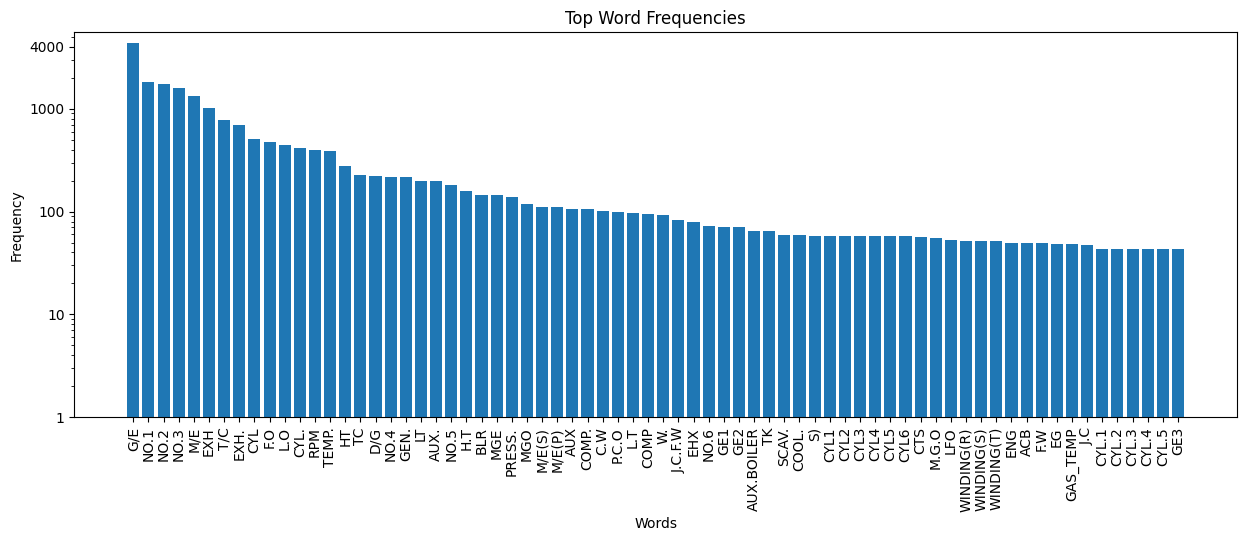

In [3]:
import matplotlib.pyplot as plt

# Select the top N words
top_n = 70
top_words = sorted_abbreviations[:top_n]
words, frequencies = zip(*top_words)

plt.figure(figsize=(15, 5))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Word Frequencies')
plt.xticks(rotation=90)  # Rotate labels to make them readable

# Set x-axis to logarithmic scale
plt.yscale('log')

# Define the positions and labels for yticks
positions = [1, 10, 100, 1000, 4000]
plt.yticks(positions, positions)

plt.show()

# Replace abbreviations

In [4]:
import re

# Abbreviations and their replacements
replacement_dict = {
    r'\bLIST\b': 'LIST',
    r'\bList\b': 'LIST',
    r'\bEXH\.': 'EXHAUST',
    r'\bEXH\b': 'EXHAUST',
    r'\bEXHAUST\.': 'EXHAUST',
    r'\bExhaust\b': 'EXHAUST',
    r'\bEXHAUST\b': 'EXHAUST',
    r'\bTEMP\.': 'TEMPERATURE',
    r'\bTEMP\b': 'TEMPERATURE',
    r'\bTEMPERATURE\.': 'TEMPERATURE',
    r'\bTEMPERATURE\b': 'TEMPERATURE',
    r'\bW\.': 'WATER',
    r'\bWATER\b': 'WATER',
    r'\bCYL\.': 'CYLINDER',
    r'\bcyl\.': 'CYLINDER',
    r'\bCYL\b': 'CYLINDER',
    r'\bcylinder\b': 'CYLINDER',
    r'\bCYLINDER\b': 'CYLINDER',
    r'\bCOOL\.': 'COOLING',
    r'\bcool\.': 'COOLING',
    r'\bcooling\b': 'COOLING',
    r'\bCOOLING\b': 'COOLING',
    r'\bcooler\b': 'COOLER',
    r'\bCOOLER\b': 'COOLER',
    r'\bScav\.': 'SCAVENGE',
    r'\bSCAV\.': 'SCAVENGE',
    r'\bINL\.': 'INLET',
    r'\binlet\b': 'INLET',
    r'\bINLET\b': 'INLET',
    r'\bOUT\.': 'OUTLET',
    r'\bOUTL\.': 'OUTLET',
    r'\boutlet\b': 'OUTLET',
    r'\bOUTLET\b': 'OUTLET',
    r'\bPRESS\.': 'PRESSURE',
    r'\bPress\.': 'PRESSURE',
    r'\bpressure\b': 'PRESSURE',
    r'\bPRESSURE\b': 'PRESSURE',
    r'\bCLR\b': 'CLEAR',
    r'\bENG\.': 'ENGINE',
    r'\bENG\b': 'ENGINE',
    r'\bENGINE\b': 'ENGINE',
    r'\bEngine speed\b': 'ENGINE SPEED',
    r'\bEngine running\b': 'ENGINE RUNNING',
    r'\bEngine RPM pickup\b': 'ENGINE RPM PICKUP',
    r'\bEngine room\b': 'ENGINE ROOM',
    r'\bM/E\b': 'MAIN ENGINE',
    r'\bME\b': 'MAIN ENGINE',
    r'\bMAIN ENGINE\b': 'MAIN ENGINE',
    r'\bGen\b': 'GENERATOR ENGINE',
    r'\bGE\b': 'GENERATOR ENGINE',
    r'\bG/E\b': 'GENERATOR ENGINE',
    r'\bDG': 'GENERATOR ENGINE',
    r'\bD/G\b': 'GENERATOR ENGINE',
    r'\bGEN\.': 'GENERATOR ENGINE',
    r'\bGENERATOR ENGINE\B': 'GENERATOR ENGINE',
    r'\bGEN\.WIND\.TEMP\b': 'GENERATOR WINDING TEMPERATURE',
    r'\bENGINE ROOM\b': 'ENGINE ROOM',
    r'\bE/R\b': 'ENGINE ROOM',
    r'\bNO1\b': 'NO.1',
    r'\bNO\.1\b': 'NO.1',
    r'\bNo\.1\b': 'NO.1',
    r'\bNO2\b': 'NO.2',
    r'\bNO\.2\b': 'NO.2',
    r'\bNo\.2\b': 'NO.2',
    r'\bNO3\b': 'NO.3',
    r'\bNO\.3\b': 'NO.3',
    r'\bNo\.3\b': 'NO.3',
    r'\bNO4\b': 'NO.4',
    r'\bNO\.4\b': 'NO.4',
    r'\bNo\.4\b': 'NO.4',
    r'\bNO5\b': 'NO.5',
    r'\bNO\.5\b': 'NO.5',
    r'\bNo\.5\b': 'NO.5',
    r'\bFLTR\b': 'FILTER',
    r'\bLUB\.': 'LUBRICANT',
    r'\bM\.G\.O\b': 'MGO',
    r'\bMGO\b': 'MGO',
    r'\bF\.O\b': 'FUEL OIL',
    r'\bFO\b': 'FUEL OIL',
    r'\bL\.T\b': 'LOW TEMPERATURE',
    r'\bLT\b': 'LOW TEMPERATURE',
    r'\bH\.T\b': 'HIGH TEMPERATURE',
    r'\bHT\b': 'HIGH TEMPERATURE',
    r'\bAUX\.': 'AUXILIARY',
    r'\bNO\.2A\b': 'NO.2A',
    r'\bNO\.2B\b': 'NO.2B',
    r'\bAUX\.BOILER\b': 'AUXILIARY BOILER',
    r'\bAUX\. BOILER\b': 'AUXILIARY BOILER',
    r'\bWIND\.': 'WINDING',
    r'\bWINDING\b': 'WINDING',
    r'\bC\.S\.W\b': 'CSW',
    r'\bCSW\b': 'CSW',
    r'\bVLOT\.': 'VOLTAGE',
    r'\bVOLTAGE\b': 'VOLTAGE',
    r'\bVOLT\.': 'VOLTAGE',
    r'\bFREQ\.': 'FREQUENCY',
    r'\bFREQUENCY\b': 'FREQUENCY',
    r'\bCURR\.': 'CURRENT',
    r'\bCURRENT\b': 'CURRENT',
    r'\bH\.F\.O\.': 'HFO',
    r'\bTCA\b': 'TURBOCHARGER',
    r'\bTCB\b': 'TURBOCHARGER',
    r'\bT/C\b': 'TURBOCHARGER',
    r'\bTC\b': 'TURBOCHARGER',
    r'\bTURBOCHARGER\b': 'TURBOCHARGER'
}

def count_abbreviation_occurrences(tag_descriptions, abbreviation):
    """Count the number of occurrences of the abbreviation in the list of machine descriptions."""
    pattern = re.compile(abbreviation)
    count = sum(len(pattern.findall(description)) for description in tag_descriptions)
    return count

def replace_abbreviations(tag_descriptions, abbreviations):
    """Replace the abbreviations according to the key-pair value provided."""
    replaced_descriptions = []
    for description in tag_descriptions:
        for abbreviation, replacement in abbreviations.items():
            description = re.sub(abbreviation, replacement, description)
        replaced_descriptions.append(description)
    return replaced_descriptions


# Replace abbreviations
replaced_descriptions = replace_abbreviations(df["tag_description"], replacement_dict)
print("Descriptions after replacement:", replaced_descriptions)


Descriptions after replacement: ['MAIN ENGINE TURBOCHARGER RPM', 'MAIN ENGINE TURBOCHARGER L.O INLET PRESS L / SLOWDOWN', 'MAIN ENGINE TURBOCHARGER L.O INLET PRESS', 'MAIN ENGINE LOAD', 'MAIN ENGINE FUEL OIL FLOW', 'MAIN ENGINE LOAD ', 'MAIN ENGINE RPM', 'NO.1 GENERATOR ENGINE WINDING TEMPERATURE U1', 'NO.1 GENERATOR ENGINE WINDING TEMPERATURE V1', 'NO.1 GENERATOR ENGINE WINDING TEMPERATURE W1', 'GENERATOR ENGINE4 CURRENT L2', 'MAIN ENGINE TURBOCHARGER LO INLET TEMPERATURE', 'MAIN ENGINE TURBOCHARGER LO INLET PRESS', 'MAIN ENGINE TURBOCHARGER LO OUTLET TEMPERATURE', 'GENERATOR ENGINE4 ACTIVE POWER', 'GENERATOR ENGINE4 FREQUENCY', 'NO.4 GENERATOR ENGINE  CHARGE AIR PRESS AIR COOLER OUTLET', 'MAIN ENGINE TURBOCHARGER RPM', 'MAIN ENGINE NO.1 TURBOCHARGER L.O IN PRESS', 'MAIN ENGINE JACKET C.F.W INLET PRESS L / SLOW DOWN', 'MAIN ENGINE SCAVENGE AIR RECEIVER PRESS ', 'MAIN ENGINE L.O INLET TO MAIN BRG & THR. BRG PRESS L / SLOWDOWN', 'MAIN ENGINE NO.1 CYLINDER EXHAUST GAS OUTLET TEMPERATURE 

In [5]:
for key, value in replacement_dict.items():
    print(f"'{key}' occurrences: {count_abbreviation_occurrences(df['tag_description'], key)}")

'\bLIST\b' occurrences: 13
'\bList\b' occurrences: 6
'\bEXH\.' occurrences: 708
'\bEXH\b' occurrences: 1724
'\bEXHAUST\.' occurrences: 0
'\bExhaust\b' occurrences: 119
'\bEXHAUST\b' occurrences: 38
'\bTEMP\.' occurrences: 432
'\bTEMP\b' occurrences: 3940
'\bTEMPERATURE\.' occurrences: 0
'\bTEMPERATURE\b' occurrences: 127
'\bW\.' occurrences: 122
'\bWATER\b' occurrences: 666
'\bCYL\.' occurrences: 740
'\bcyl\.' occurrences: 6
'\bCYL\b' occurrences: 1247
'\bcylinder\b' occurrences: 99
'\bCYLINDER\b' occurrences: 98
'\bCOOL\.' occurrences: 59
'\bcool\.' occurrences: 1
'\bcooling\b' occurrences: 6
'\bCOOLING\b' occurrences: 57
'\bcooler\b' occurrences: 18
'\bCOOLER\b' occurrences: 71
'\bScav\.' occurrences: 11
'\bSCAV\.' occurrences: 62
'\bINL\.' occurrences: 4
'\binlet\b' occurrences: 50
'\bINLET\b' occurrences: 1353
'\bOUT\.' occurrences: 41
'\bOUTL\.' occurrences: 16
'\boutlet\b' occurrences: 113
'\bOUTLET\b' occurrences: 706
'\bPRESS\.' occurrences: 140
'\bPress\.' occurrences: 9
'\bpr

In [6]:
for key, value in replacement_dict.items():
    print(f"'{key}' occurrences: {count_abbreviation_occurrences(replaced_descriptions, key)}")

'\bLIST\b' occurrences: 19
'\bList\b' occurrences: 0
'\bEXH\.' occurrences: 0
'\bEXH\b' occurrences: 0
'\bEXHAUST\.' occurrences: 0
'\bExhaust\b' occurrences: 0


'\bEXHAUST\b' occurrences: 1872
'\bTEMP\.' occurrences: 0
'\bTEMP\b' occurrences: 0
'\bTEMPERATURE\.' occurrences: 6
'\bTEMPERATURE\b' occurrences: 4797
'\bW\.' occurrences: 0
'\bWATER\b' occurrences: 788
'\bCYL\.' occurrences: 0
'\bcyl\.' occurrences: 0
'\bCYL\b' occurrences: 0
'\bcylinder\b' occurrences: 0
'\bCYLINDER\b' occurrences: 1126
'\bCOOL\.' occurrences: 0
'\bcool\.' occurrences: 0
'\bcooling\b' occurrences: 0
'\bCOOLING\b' occurrences: 123
'\bcooler\b' occurrences: 0
'\bCOOLER\b' occurrences: 89
'\bScav\.' occurrences: 0
'\bSCAV\.' occurrences: 0
'\bINL\.' occurrences: 0
'\binlet\b' occurrences: 0
'\bINLET\b' occurrences: 1407
'\bOUT\.' occurrences: 0
'\bOUTL\.' occurrences: 0
'\boutlet\b' occurrences: 0
'\bOUTLET\b' occurrences: 855
'\bPRESS\.' occurrences: 0
'\bPress\.' occurrences: 0
'\bpressure\b' occurrences: 0
'\bPRESSURE\b' occurrences: 273
'\bCLR\b' occurrences: 0
'\bENG\.' occurrences: 0
'\bENG\b' occurrences: 0
'\bENGINE\b' occurrences: 7057
'\bEngine speed\b' occu